# Introduction to Sequential Parameter Optimization
## Isotropic and Anisotropic Kriging

## 1 Example: Isotropic `Spot` Surrogate and the 2-dim Sphere Function

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### The Objective Function: 2-dim Sphere

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
   $$f(x, y) = x^2 + y^2$$

In [2]:
fun = analytical().fun_sphere
fun_control = {"sigma": 0,
               "seed": 123}

* The size of the `lower` bound vector determines the problem dimension.
* Here we will use `np.array([-1, -1])`, i.e., a two-dim function.

In [3]:
spot_2 = spot.Spot(fun=fun,
                   lower = np.array([-1, -1]),
                   upper = np.array([1, 1]))

spot_2.run()

### Results

In [4]:
spot_2.print_results()

min y: 1.8750731199649933e-05
x0: 0.0015130475553084242
x1: 0.0040572673433020325


[['x0', 0.0015130475553084242], ['x1', 0.0040572673433020325]]

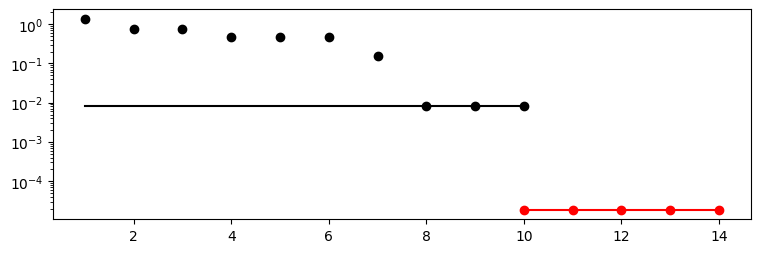

In [5]:
spot_2.plot_progress(log_y=True)

## 2 Same, but with anisotropic Kriging

* The default parameter setting of `spotPython`'s Kriging surrogate uses the same `theta` value for every dimension.
* This is referred to as "using an isotropic kernel". 
* If different `theta` values are used for each dimension, then an anisotropic kernel is used
* To enable anisotropic models in `spotPython`, the number of `theta` values should be larger than one.
* We can use `surrogate_control={"n_theta": 2}` to enable this behavior (`2` is the problem dimension).

In [6]:
spot_2_anisotropic = spot.Spot(fun=fun,
                   lower = np.array([-1, -1]),
                   upper = np.array([1, 1]),
                   surrogate_control={"n_theta": 2})
spot_2_anisotropic.run()

### Taking a Look at the `theta` Values

* We can check, whether one or several `theta` values were used.
* The `theta` values from the surrogate can be printed as follows:

In [7]:
spot_2_anisotropic.surrogate.theta

array([0.16545225, 0.28999215])

* Since the surrogate from the isotropic setting was stored as `spot_2`, we can also take a look at the `theta` value from this model:

In [8]:
spot_2.surrogate.theta

array([0.26287446])

* Next, the search progress of the optimization with the anisotropic model can be visualized:

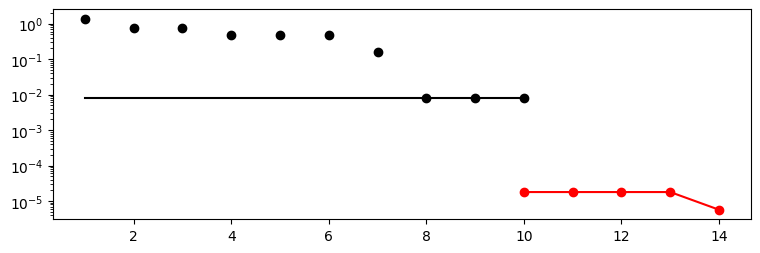

In [9]:
spot_2_anisotropic.plot_progress(log_y=True)

In [10]:
spot_2_anisotropic.print_results()

min y: 5.68261952864018e-06
x0: -0.002137037687426695
x1: -0.0010562620182313395


[['x0', -0.002137037687426695], ['x1', -0.0010562620182313395]]

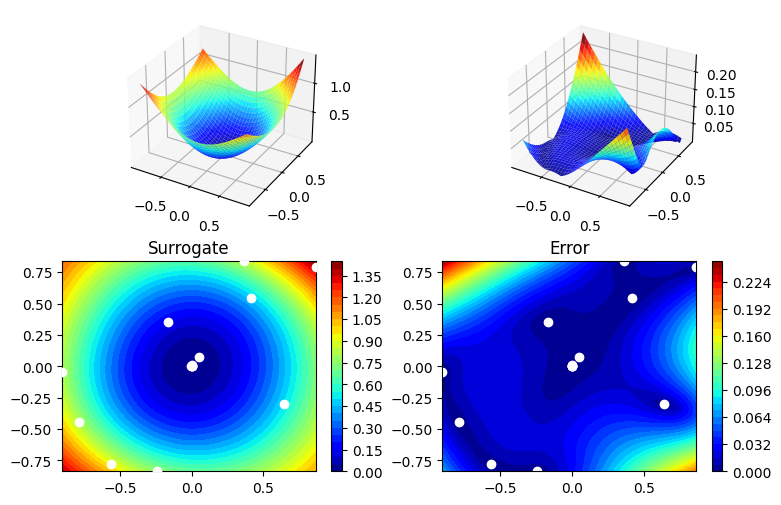

In [11]:
spot_2_anisotropic.surrogate.plot()

# Exercises


* Important:
    * Results from these exercises should be added to this document, i.e., you should submit an updated version of this notebook.
    * Please combine your results using this notebook.
    * Only one notebook from each group!
    * Presentation is based on this notebook. No addtional slides are required!
    * spotPython version `0.16.11` (or greater) is required (see http://www.gm.fh-koeln.de/~bartz/site/download/)

## Exercise 1

* Each team member should choose one of the following objective functions.
* Please add your name to the section title!

### 1. `fun_branin`

* Describe the function.
  * The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 10$ and $0 \leq x_2 \leq 15$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion: instead of the number of evaluations (which is specified via `fun_evals`), the time should be used as the termination criterion. This can be done as follows (`max_time=1` specifies a run time of one minute):

In [12]:
fun_evals=inf,
max_time=1,

### 2. `fun_sin_cos`

* Describe the function.
  *  The input dimension is `2`. The search range is  $-2\pi \leq x_1 \leq 2\pi$ and $-2\pi \leq x_2 \leq 2\pi$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.

### 3. `fun_runge`

* Describe the function.
  *  The input dimension is `2`. The search range is  $-5 \leq x_1 \leq 5$ and $-5 \leq x_2 \leq 5$.
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.

### 4. `fun_wingwt`

* Describe the function.
  *  The input dimension is `10`. The search ranges are between 0 and 1 (values are mapped internally to their natural bounds).
* Compare the results from `spotPython` run a) with isotropic and b) anisotropic surrogate models.
* Modify the termination criterion (`max_time` instead of `fun_evals`) as described for `fun_branin`.

# Solutions

### 1. `fun_branin`

### 2. `fun_sin_cos`

### 3. `fun_runge`

### 4. `fun_wingwt`